# Case Study : Binary Classification using CNN

In [1]:
# Importing neccesary libraries

from PIL import Image
import numpy as np
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import tensorflow
from tensorflow import keras
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

* Loading Train, Validation and Test data

In [2]:
train_dir = '/content/drive/MyDrive/Data/Vegetables/train'
train_dir = pathlib.Path(train_dir)
train_dir

PosixPath('/content/drive/MyDrive/Data/Vegetables/train')

In [3]:
validation_dir = '/content/drive/MyDrive/Data/Vegetables/validation'
validation_dir = pathlib.Path(validation_dir)
validation_dir

PosixPath('/content/drive/MyDrive/Data/Vegetables/validation')

In [4]:
test_dir = '/content/drive/MyDrive/Data/Vegetables/test'
test_dir = pathlib.Path(test_dir)
test_dir

PosixPath('/content/drive/MyDrive/Data/Vegetables/test')

* Visualizing Training data

In [5]:
Tomato = list(train_dir.glob('Tomato/*'))
Potato = list(train_dir.glob('Potato/*'))

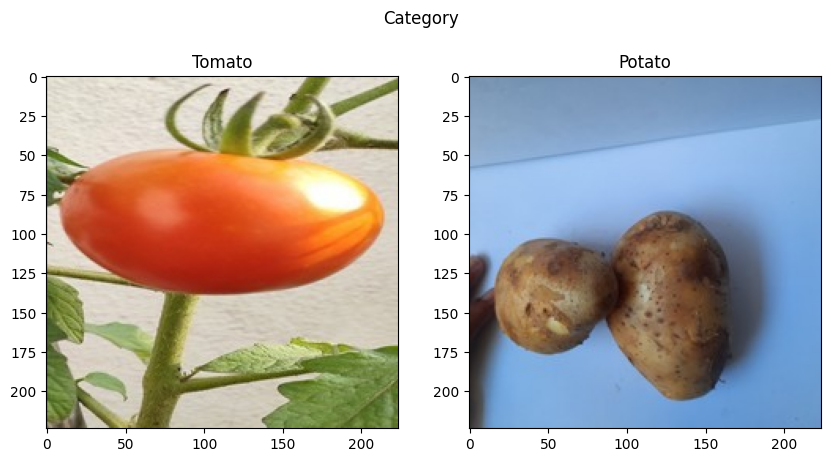

In [6]:
fig, ax = plt.subplots(ncols= 2, nrows = 1, figsize=(10,5))
fig.suptitle('Category')

tomato_img = img.imread(Tomato[0])
potato_img = img.imread(Potato[0])

ax[0].set_title('Tomato')
ax[1].set_title('Potato')

ax[0].imshow(tomato_img)
ax[1].imshow(potato_img)

* df_images organizes the paths to images based on their categories
* df_labels assigns numerical labels to each category

In [7]:
df_images = {
    'Tomato':Tomato,
    'Potato':Potato
}

df_labels = {
    'Tomato':0,
    'Potato':1
}

* Checking the shape of training images

In [8]:
img = Image.open(str(df_images['Tomato'][0]))
img_array = np.array(img) # Convert the image to numerical array
img_shape = img_array.shape # Check the shape of the array
print(img_shape)

(224, 224, 3)


*  Initializing two empty lists, X and y, where X will store the images and y will store their corresponding labels.
* For each image, open it using Pillow's Image.open() function, convert it to RGB format if needed, resize it to a specified size (224 x 224 pixels), and convert it into a NumPy array.
* The resized image is added to the X list, and its corresponding label (obtained from df_labels) is added to the y list.

In [9]:
X, y = [], []  # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = Image.open(image)
        X.append(np.array(img))
        y.append(df_labels[label])

* There are 2000 images in X and 2000 labels in y

In [10]:
print('len(X) : ',len(X))
print('len(y) : ',len(y))

len(X) :  2000
len(y) :  2000


* Normalizing the array

In [12]:
# Standardize
X = np.array(X, dtype='float32') / 255.0  # Convert to float and normalize
y = np.array(y)

In [13]:
print(X.shape)
print(y.shape)

(2000, 224, 224, 3)
(2000,)


* Converting labels in y to categorical format

In [14]:
y_cat = to_categorical(y)

# Preparing validation data

* Same steps as above are repeated

In [15]:
# Validation Data

Tomato = list(validation_dir.glob('Tomato/*'))
Potato = list(validation_dir.glob('Potato/*'))

val_images = {
    'Tomato':Tomato,
    'Potato':Potato
}

val_labels = {
    'Tomato':0,
    'Potato':1
}

X_val, y_val = [], []  # X = images, y = labels
for label, images in val_images.items():
    for image in images:
        img = Image.open(image)
        X_val.append(np.array(img))
        y_val.append(val_labels[label])

img = Image.open(str(val_images['Tomato'][0]))
img_array = np.array(img) # Convert the image to numerical array
img_shape = img_array.shape # Check the shape of the array
print(img_shape)

# Standardize
X_val = np.array(X_val, dtype='float32') / 255.0
y_val = np.array(y_val)

print(X_val.shape)
print(y_val.shape)

y_val = to_categorical(y_val)

print(X_val.shape)
print(y_val.shape)

(224, 224, 3)
(400, 224, 224, 3)
(400,)
(400, 224, 224, 3)
(400, 2)


# Building the Model

In [38]:
cnn = Sequential()

cnn.add(Conv2D(32,kernel_size=(5,5),input_shape=(224,224,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128,kernel_size=(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256,kernel_size=(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(512,activation = 'relu'))
cnn.add(Dense(256,activation='relu'))
cnn.add(Dense(128,activation = 'relu'))
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dense(2,activation='sigmoid'))

cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 28, 28, 128)      

# Training the model

In [39]:
history = cnn.fit(X,y_cat,epochs=25,validation_data=(X_val,y_val))

Epoch 1/25
63/63 [==============================] - 10s 111ms/step - loss: 0.5651 - accuracy: 0.7225 - val_loss: 0.4854 - val_accuracy: 0.8325
Epoch 2/25
63/63 [==============================] - 6s 96ms/step - loss: 0.0948 - accuracy: 0.9745 - val_loss: 0.0236 - val_accuracy: 0.9925
Epoch 3/25
63/63 [==============================] - 6s 98ms/step - loss: 0.0637 - accuracy: 0.9840 - val_loss: 0.0061 - val_accuracy: 0.9950
Epoch 4/25
63/63 [==============================] - 6s 96ms/step - loss: 0.0796 - accuracy: 0.9820 - val_loss: 0.0177 - val_accuracy: 0.9950
Epoch 5/25
63/63 [==============================] - 7s 104ms/step - loss: 0.0232 - accuracy: 0.9940 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 6/25
63/63 [==============================] - 6s 97ms/step - loss: 0.0919 - accuracy: 0.9845 - val_loss: 7.0307e-04 - val_accuracy: 1.0000
Epoch 7/25
63/63 [==============================] - 6s 100ms/step - loss: 0.0683 - accuracy: 0.9905 - val_loss: 0.0636 - val_accuracy: 0.9925
Epoch

In [40]:
cnn.evaluate(X_val,y_val)

13/13 [==============================] - 0s 29ms/step - loss: 0.1850 - accuracy: 0.9875


[0.18497514724731445, 0.987500011920929]

# Preprocessing Test data

* Preprocessing steps performed while preprocessing the training dataset and testing dataset are repeated.

In [20]:
# Test Data

Tomato = list(test_dir.glob('Tomato/*'))
Potato = list(test_dir.glob('Potato/*'))

test_images = {
    'Tomato':Tomato,
    'Potato':Potato
}

test_labels = {
    'Tomato':0,
    'Potato':1
}

X_test, y_test = [], []  # X = images, y = labels
for label, images in test_images.items():
    for image in images:
        img = Image.open(image)
        X_test.append(np.array(img))
        y_test.append(test_labels[label])

img = Image.open(str(test_images['Tomato'][0]))
img_array = np.array(img) # Convert the image to numerical array
img_shape = img_array.shape # Check the shape of the array
print(img_shape)

# Standardize
X_test = np.array(X_test, dtype='float32') / 255.0  # Convert to float and normalize
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

y_test = to_categorical(y_test)

print(X_test.shape)
print(y_test.shape)

(224, 224, 3)
(400, 224, 224, 3)
(400,)
(400, 224, 224, 3)
(400, 2)


# Evaluating the model using Test data

In [41]:
cnn.evaluate(X_test,y_test)

13/13 [==============================] - 0s 30ms/step - loss: 0.0120 - accuracy: 0.9975


[0.012049858458340168, 0.9975000023841858]

# Testing the model with user inputs

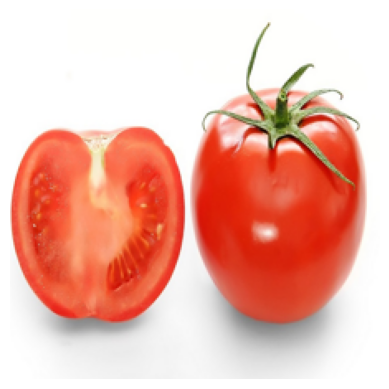

In [42]:
# Load the image
img_path = '/content/tomato.jpg'
img = Image.open(img_path)

img = img.resize((224, 224))  # Resize the image to (224, 224)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [43]:
# Convert the image to a numpy array
img_array = np.array(img)

# Display the shape of the image array
print("Image Shape:", img_array.shape)

# Convert the image to a numpy array and normalize it
img_array = np.array(img) / 255.0

# Display the shape of the normalized image array
print("Image Shape (normalized):", img_array.shape)

predictions = cnn.predict(np.expand_dims(img_array, axis=0))
print(predictions)

# Get the index of the maximum value
predicted_index = np.argmax(predictions)

# Map the index to the corresponding class
if predicted_index == 0:
    predicted_class = 'Tomato'
elif predicted_index == 1:
    predicted_class = 'Potato'
else:
    predicted_class = 'Unknown'

print("Predicted Class:", predicted_class)

Image Shape: (224, 224, 3)
Image Shape (normalized): (224, 224, 3)
1/1 [==============================] - 0s 141ms/step
[[1.         0.00105656]]
Predicted Class: Tomato


# Test input 2

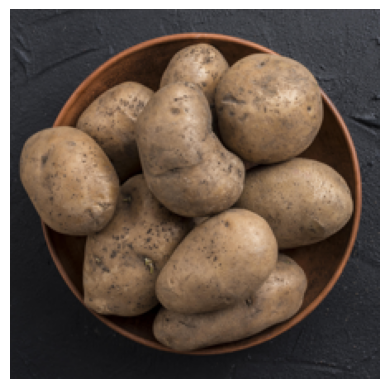

In [44]:
# Load the image
img_path = '/content/potato.jpg'
img = Image.open(img_path)
img = img.resize((224, 224))  # Resize
plt.imshow(img) # Display
plt.axis('off')
plt.show()

In [45]:
img_array = np.array(img)
print("Image Shape:", img_array.shape)

Image Shape: (224, 224, 3)


In [46]:
img_array = np.array(img) / 255.0
print("Image Shape (normalized):", img_array.shape)

Image Shape (normalized): (224, 224, 3)


In [47]:
predictions = cnn.predict(np.expand_dims(img_array, axis=0))
print(predictions)

1/1 [==============================] - 0s 19ms/step
[[0.4691737  0.60329986]]


In [48]:
predicted_index = np.argmax(predictions)

if predicted_index == 0:
    predicted_class = 'Tomato'
elif predicted_index == 1:
    predicted_class = 'Potato'
else:
    predicted_class = 'Unknown'

print("Predicted Class:", predicted_class)

Predicted Class: Potato
